In [1]:
#Importing essential Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
#Importing datset using pandas
df = pd.read_csv('HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
#Determining the shape of dataset
df.shape

(14999, 10)

In [4]:
#Printing all the names of column
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [5]:
#Defining Correlation matrix
correl = df.corr()
correl

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


In [6]:
#Importing Seaborn Librabry
import seaborn as sns

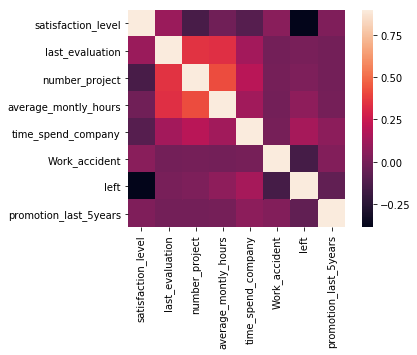

In [7]:
#Plotting heatmap 
plt.subplots()
sns.heatmap(correl, vmax = .9, square = True)

In [8]:
#Understanding the data by getting mean of independant variable for our target value
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
Department               14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [10]:
#Understanding and Visualising the impact of Salary on the target value(left)
df.salary.value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

Text(0.5, 0, 'Salary')

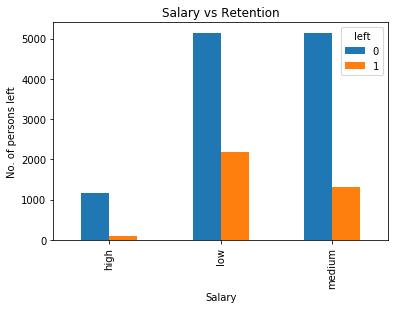

In [11]:
pd.crosstab(df.salary, df.left).plot(kind = 'bar')
plt.title('Salary vs Retention')
plt.ylabel('No. of persons left')
plt.xlabel('Salary')

In [12]:
df.salary[df.left == 1].value_counts()

low       2172
medium    1317
high        82
Name: salary, dtype: int64

In [13]:
df.salary[df.left == 0].value_counts()

low       5144
medium    5129
high      1155
Name: salary, dtype: int64

In [14]:
#Calculating the percentage of employees leaving the job based on their salary
persons_with_high_salary = df.salary[(df.salary == 'high') & (df.left == 1)].count()
persons_with_high_salary_total = df.salary[df.salary == 'high'].count()
percentage_high = (persons_with_high_salary/persons_with_high_salary_total)*100
percentage_high

6.628940986257073

In [15]:
persons_with_medium_salary = df.salary[(df.salary == 'medium') & (df.left == 1)].count()
persons_with_medium_salary_total = df.salary[df.salary == 'medium'].count()
percentage_medium = (persons_with_medium_salary/persons_with_medium_salary_total)*100
percentage_medium

20.431275209432208

In [16]:
persons_with_low_salary = df.salary[(df.salary == 'low') & (df.left == 1)].count()
persons_with_low_salary_total = df.salary[df.salary == 'low'].count()
percentage_low = (persons_with_low_salary/persons_with_low_salary_total)*100
percentage_low

29.68835429196282

([<matplotlib.axis.YTick at 0x1e93a504160>,
 <a list of 11 Text yticklabel objects>)

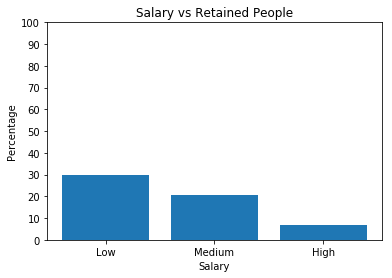

In [17]:
y = np.array([percentage_low, percentage_medium, percentage_high])
x = ['Low', 'Medium', 'High']
plt.bar(x, y)
plt.title('Salary vs Retained People')
plt.ylabel('Percentage')
plt.xlabel('Salary')
plt.yticks(np.arange(0, 101, 10))

In [18]:
#Understanding and Visualising the impact of Department on the target value(left)
df.Department.value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: Department, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

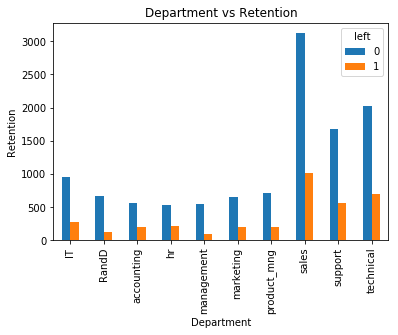

In [19]:
pd.crosstab(df.Department, df.left).plot(kind='bar')
plt.title('Department vs Retention')
plt.xlabel('Department')
plt.ylabel('Retention')
plt.xticks(rotation = 90)

In [20]:
#Calculating the percentage of employees leaving the job of different Department
df.Department.values

array(['sales', 'sales', 'sales', ..., 'support', 'support', 'support'],
      dtype=object)

In [21]:
col = ['IT', 'RandD', 'accounting', 'hr', 'management', 'marketing', 'product_mng', 'sales', 'support', 'technical']
l = []
for i in col:
    l.append(((df.Department[(df.Department == i) & (df.left == 1)].count())/(df.Department[df.Department == i].count()))*100)

In [22]:
l

[22.249388753056234,
 15.374841168996186,
 26.597131681877446,
 29.093369418132614,
 14.444444444444443,
 23.65967365967366,
 21.951219512195124,
 24.492753623188406,
 24.89905787348587,
 25.624999999999996]

Text(0.5, 1.0, 'Departmental Analysis')

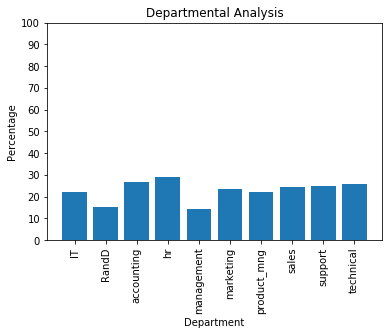

In [23]:
y = np.array(l)
x = ['IT', 'RandD', 'accounting', 'hr', 'management', 'marketing', 'product_mng', 'sales', 'support', 'technical']
plt.bar(x,y)
plt.yticks(np.arange(0, 101, 10))
plt.xticks(rotation = 90)
plt.ylabel('Percentage')
plt.xlabel('Department')
plt.title('Departmental Analysis')

In [24]:
s = pd.DataFrame({"Department" : ['IT', 'RandD', 'accounting', 'hr', 'management', 'marketing', 'product_mng', 'sales', 'support', 'technical'],
                 "Percentage" : l})

In [25]:
s

,Department,Percentage
0,IT,22.249389
1,RandD,15.374841
2,accounting,26.597132
3,hr,29.093369
4,management,14.444444
5,marketing,23.659674
6,product_mng,21.951220
7,sales,24.492754
8,support,24.899058
9,technical,25.625000


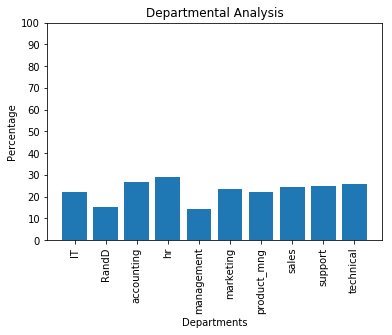

In [26]:
plt.bar(s.Department, s.Percentage)
plt.title('Departmental Analysis')
plt.xlabel('Departments')
plt.ylabel('Percentage')
plt.xticks(rotation = 90)
plt.yticks(np.arange(0,101,10))
plt.savefig('Departmental Analysis')

In [28]:
#Understanding the importance of No. of projects done by employees
df.number_project.value_counts()

4    4365
3    4055
5    2761
2    2388
6    1174
7     256
Name: number_project, dtype: int64

Text(0, 0.5, 'Retentions')

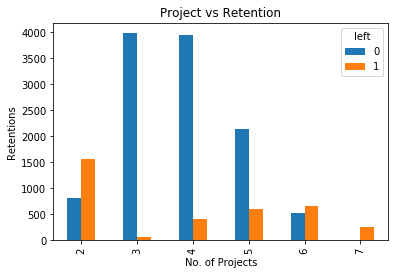

In [29]:
pd.crosstab(df.number_project, df.left).plot(kind = 'bar')
plt.title('Project vs Retention')
plt.xlabel('No. of Projects')
plt.ylabel('Retentions')

In [30]:
l1 = []
for i in range(2, 8):
    l1.append((df.number_project[(df.number_project == i) & (df.left == 1)].count()/df.number_project[df.number_project == i].count())*100)
l1

[65.61976549413735,
 1.775585696670777,
 9.369988545246278,
 22.1658819268381,
 55.792163543441234,
 100.0]

In [31]:
s1 = pd.DataFrame({"NumberOfProject" : range(2, 8),
                  "PercnetageRetention" : l1})
s1

,NumberOfProject,PercnetageRetention
0,2,65.619765
1,3,1.775586
2,4,9.369989
3,5,22.165882
4,6,55.792164
5,7,100.000000


Text(0, 0.5, 'Retention Percentage')

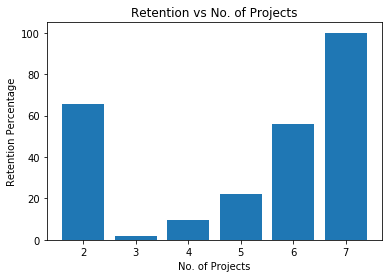

In [32]:
plt.bar(s1.NumberOfProject, s1.PercnetageRetention)
plt.title('Retention vs No. of Projects')
plt.xlabel('No. of Projects')
plt.ylabel('Retention Percentage')

In [33]:
l2 = []
for i in range(2, 8):
    l2.append(df.left[df.number_project == i].value_counts())


In [34]:
#Defining the Independant variable X
X = df.drop(['left'], axis = 1)
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,0,sales,low
1,0.80,0.86,5,262,6,0,0,sales,medium
2,0.11,0.88,7,272,4,0,0,sales,medium
3,0.72,0.87,5,223,5,0,0,sales,low
4,0.37,0.52,2,159,3,0,0,sales,low


In [35]:
#Defining Dependant variable or Target varaible y
y = df.left
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [36]:
#Since in our Dataset Department and salary are categorical data, therefore converting them to dummy variables
#Getting dummies for Depatment
dep = pd.get_dummies(X.Department, prefix='Department',drop_first = True)

In [37]:
dep.head()

,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,1,0,0


In [38]:
#Getting dummies for Salary
sal = pd.get_dummies(X.salary, prefix='Salary', drop_first = True) #dropping first column to avoid dummy variable trap

In [39]:
sal.head()

,Salary_low,Salary_medium
0,1,0
1,0,1
2,0,1
3,1,0
4,1,0


In [40]:
#Joining dummies of department and salary in X
merged = pd.concat([X, sal, dep], axis = 1)
merged.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary,Salary_low,Salary_medium,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
0,0.38,0.53,2,157,3,0,0,sales,low,1,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,0,sales,medium,0,1,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,sales,medium,0,1,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,sales,low,1,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,sales,low,1,0,0,0,0,0,0,0,1,0,0


In [41]:
#dropping Department and salary columns from merged set
merged.drop(['salary', 'Department'], axis = 1, inplace=True)
merged.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Salary_low,Salary_medium,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
0,0.38,0.53,2,157,3,0,0,1,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,0,0,1,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,0,1,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,1,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,1,0,0,0,0,0,0,0,1,0,0


In [42]:
#Splitting the data set into train and test sets
from sklearn.model_selection import train_test_split
merged_train, merged_test, y_train, y_test = train_test_split(merged, y, test_size = 0.2, random_state = 0)


In [43]:
#Preparing the Logistic Regression model
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(merged_train, y_train)

C:\Users\Shivam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [44]:
y_pred_reg = reg.predict(merged_test)

In [45]:
score_reg = reg.score(merged_test, y_test)
score_reg

0.7863333333333333

In [46]:
#Preparing RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
clas = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
clas.fit(merged_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [47]:
y_pred_rfc = clas.predict(merged_test)

In [48]:
score_rfc = clas.score(merged_test, y_test)
score_rfc

0.9873333333333333

In [49]:
#Import metrics for Evaluation
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_rfc)

In [50]:
#CM for Random Forest Classification
cm

array([[2286,   13],
       [  25,  676]], dtype=int64)

In [51]:
#CM for Logistic Regression 
cm_reg = confusion_matrix(y_test, y_pred_reg)

In [52]:
cm_reg

array([[2136,  163],
       [ 478,  223]], dtype=int64)

In [53]:
#Building NaiveBayes CLassifier model
from sklearn.naive_bayes import GaussianNB
clas_nb = GaussianNB()
clas_nb.fit(merged_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [54]:
y_pred_nb = clas_nb.predict(merged_test)

In [55]:
score_nb = clas_nb.score(merged_test, y_test)
score_nb

0.742

In [56]:
#CM for NaiveBayes
cm_nb = confusion_matrix(y_test, y_pred_nb)

In [57]:
cm_nb

array([[1670,  629],
       [ 145,  556]], dtype=int64)

([<matplotlib.axis.XTick at 0x1e93843f2b0>,
 <a list of 3 Text xticklabel objects>)

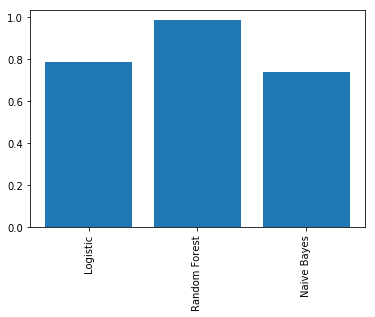

In [58]:
#Comparing the models and their scores
score = np.array([score_reg, score_rfc, score_nb])
x_axis = np.arange(1,4)
plt.bar(x_axis, score)
plt.xticks([1,2,3], ['Logistic', 'Random Forest', 'Naive Bayes'], rotation=90)